# Machine Learning for Neuroimaging

Made by Daria Zotova and Elizaveta Genke  
Code used: http://nilearn.github.io/index.html  
Before starting the tutorial run "pip install -r requirements.txt" in the folder with downloaded repository.

In [1]:
from scipy.misc import imread
import matplotlib.pyplot as plt
import pandas as pd

from nilearn import datasets
from nilearn.plotting import show
from nilearn import plotting
from nilearn.input_data import NiftiMasker

C:\Users\home\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\Users\home\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


### Upload dataset from a folder

In [2]:
path = 'C:/ZOTOVA/ERASMUS/3RD SEMESTER/eHealth/Student Lab/'

In [ ]:
haxby_dataset = datasets.fetch_haxby(data_dir = path,fetch_stimuli=True)

### Visualize stimuli

C:\Users\home\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
C:\Users\home\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:165: DeprecationWarning: `fromimage` is deprecated!
`fromimage` is deprecated in SciPy 1.0.0. and will be removed in 1.2.0.
Use ``np.asarray(im)`` instead.
  return fromimage(im, flatten=flatten, mode=mode)


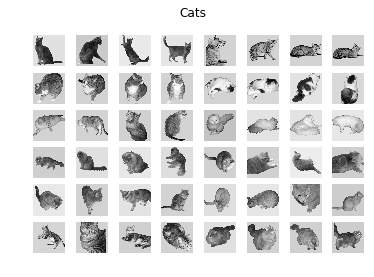

In [3]:
#haxby_dataset = datasets.fetch_haxby(subjects=[], fetch_stimuli=True)
stimulus_information = haxby_dataset.stimuli
# Show cats
plt.figure()
for i in range(48):
    plt.subplot(6, 8, i + 1)
    plt.imshow(imread(stimulus_information['cats'][i]), cmap=plt.cm.gray)
    plt.axis("off")
    plt.suptitle('Cats')


C:\Users\home\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
C:\Users\home\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:165: DeprecationWarning: `fromimage` is deprecated!
`fromimage` is deprecated in SciPy 1.0.0. and will be removed in 1.2.0.
Use ``np.asarray(im)`` instead.
  return fromimage(im, flatten=flatten, mode=mode)


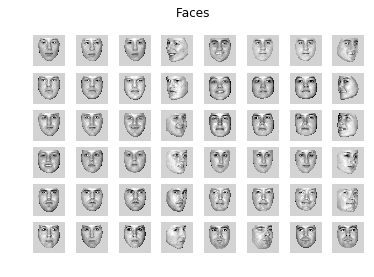

In [4]:
# Show faces
plt.figure()
for i in range(48):
    plt.subplot(6, 8, i + 1)
    plt.imshow(imread(stimulus_information['faces'][i]), cmap=plt.cm.gray)
    plt.axis("off")
    plt.suptitle('Faces')

### Download full dataset and apply ROI mask provided

C:\Users\home\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


C:/ZOTOVA/ERASMUS/3RD SEMESTER/eHealth/Student Lab/haxby2001\subj2\bold.nii.gz


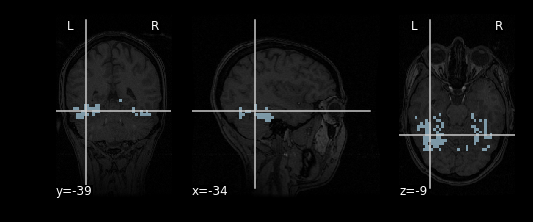

In [5]:
fmri_filename = haxby_dataset.func[0]

# Convert the fMRI volume's to a data matrix
# The mask is a mask of the Ventral Temporal streaming coming from the
# Haxby study:
mask_filename = haxby_dataset.mask_vt[0]

# Visualize it, using the subject's anatomical image as a
# background

plotting.plot_roi(mask_filename, bg_img=haxby_dataset.anat[0],
                 cmap='Paired')
print(fmri_filename)

### Extract fMRI data on a mask

In [ ]:
# Use "NiftiMasker" to extract the fMRI data on a mask and convert it to data series.
masker = NiftiMasker(mask_img=mask_filename, standardize=True)

# We give the masker a filename and retrieve a 2D array ready
# for machine learning with scikit-learn
fmri_masked = masker.fit_transform(fmri_filename)

# The shape of "fmri_masked" array corresponds to the number of time-points times the number of
# voxels in the mask
print("Shape of an array: ", fmri_masked.shape)


### Restrict the analysis to cats and faces

In [ ]:
# Load the behavioral information stored in a CSV file
behavioral = pd.read_csv(haxby_dataset.session_target[0], sep=" ")

# Retrieve the experimental conditions (labels), that are prediction targets in the decoding
labels_all = behavioral['labels']

# Keep only the data corresponding to faces oand cats
labels_mask = labels_all.isin(['face', 'cat'])

# Apply this mask in the sampe direction to restrict the
# classification to the face vs cat discrimination
fmri_masked = fmri_masked[labels_mask]
# We now have less samples
print(fmri_masked.shape)

# Apply the same mask to the targets
labels = labels_all[labels_mask]
print(labels.shape)

### Predict targets using Support Vector Classification

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [ ]:
# Manually split data into training and test sets
# Choose how many examples you want to put for the training set and put the rest for the test set

X_train = fmri_masked[]
Y_train = labels[]
X_test = fmri_masked[]
Y_test = labels[]

# Train the model
svc.fit(X_train,Y_train)

# Test the model
prediction = svc.predict(X_test)
# Compute accuracy of SVC classifier
accuracy = 
print(accuracy)

# To load the solution uncomment the line below
# %load .\solutions\solution1.py


### Try to use other types of kernels for SVC and explore if it improves results

In [ ]:
svc = SVC(kernel='')

X_train = fmri_masked[]
Y_train = labels[]
X_test = fmri_masked[]
Y_test = labels[]

# Train the model
svc.fit(X_train,Y_train)

# Test the model
prediction = svc.predict(X_test)
# Compute accuracy of SVC classifier
accuracy = 
print(accuracy)

# To load the solution uncomment the line below
# %load .\solutions\solution2.py

### Cross-validation with "KFold"

In [ ]:
# We can split the data in train and test set repetitively in a "KFold" strategy:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)

# The "cv" object's split method can now accept data and create a
# generator which can yield the splits.
for train, test in cv.split(X=fmri_masked):
    labels_masked = labels.values[train]
    svc.fit(fmri_masked[train], labels_masked)
    prediction = svc.predict(fmri_masked[test])
    print((prediction == labels.values[test]).sum()
           / float(len(labels.values[test])))

### Cross-validation with scikit-learn

In [ ]:
# Scikit-learn has tools to perform cross-validation in one line.
# Explore "cross_val_score" function and evaluate a score by cross-validation 
from sklearn.model_selection import cross_val_score
#cv_score = cross_val_score(svc, fmri_masked, labels)
cv_score =
print(cv_score)

# To load the solution uncomment the line below
# %load .\solutions\solution3.py

### Logistic Regression classifier

In [ ]:
# Perform classification by using Logistic Regression classifier.
from sklearn.linear_model import LogisticRegression

# Try to use it with default parameters 
logistic_cv = 

# Train the model
logistic_cv.fit(X_train, Y_train)

# Test the model
prediction = logistic_cv.predict(X_test)
# Compute accuracy of Logistic Regression classifier
accuracy = 
print(accuracy)

# To load the solution uncomment the line below
# %load .\solutions\solution4.py

In [ ]:
# Use Cross-validation from scikit-learn and compute scores
log_cv_score = 
print(log_cv_score)

# To load the solution uncomment the line below
# %load .\solutions\solution5.py